In [1]:
import numpy as np

In [2]:
#########defining constants################
h  = 6.625e-34   #plank'sconstant
NA  = 6.023e23   #Avagadro Number
k_B  = 1.38e-23    # Boltzmann Constant
pi = np.pi         # pi
######################################################

In [3]:
#system specific
M=227.94*1e-3 # Kg/mol  #molar mass Kg/mol
V=437.02*1e-30        # volume in m^3
rho=3646.4446         # density in Kg/m^3
nf=2                   # formula units
n=5                    # no. of atoms in molecule or formula
N=n*nf                  # no. of atoms  in unitcell
T_R=300                   # Temperature in K

In [4]:
def mean_velocity(vl,vt):
    vm=((1.0/3.0)*((2.0/vt**3)+(1.0/vl**3)))**(-1/3.0)
    return vm
####
def debye(vl,vt):
   #Debye temperature:
    temp=((3*n)/(4*pi))*((NA*rho)/M)
    theta_dbye=(h/k_B)*pow(temp,1/3)*mean_velocity(vl,vt)
    return theta_dbye
####
def gruneissen(vl,vt):
    g1=9*((vl**2)-((4/3)*(vt**2)))
    g2=2*((vl**2)+(2*(vt**2)))
    grnu_p=g1/g2;
    #print(grnu)
    return grnu_p

In [5]:
def kappa_l(vl,vt,Tk):
    #inputs longitudinal velocity, transverse velocity,
    # Temperature K
    theta_d=debye(vl,vt)
    grnu= gruneissen(vl,vt)
    del0=pow(V/N,1/3)
    #grnu=(3/2)*((1+nu)/(2-3*nu)) #calculating grnu using possion ratio
    A=(5.72*1e7*(0.849/2))*(1/(1-(0.514/grnu)+(0.228/(grnu**2))))
    k1=A*(M/n)*del0*pow(theta_d,3)
    k2=pow(grnu,2)*pow(N,2/3)*Tk
    Kl=k1/k2
    #print(kl)
    return Kl
####
def kappa_vs_T(Temp_arr,vl,vt):
    #gets a Temperature value and give it as file
    kl_data=np.zeros(shape=(len(Temp_arr),2))
    for i in range(len(Temp_arr)):
        t= Temp_arr[i]
        #print(t)
        ki=kappa_l(vl,vt,t)
        kl_data[i,0]=t
        kl_data[i,1]=ki
        ##
    return kl_data

In [6]:
#isotropic_variables
Vl=3596.32    #in m/s
Vt=1918.38  #in m/s
T_min=300
T_max=700
T_step=int((T_max-T_min)/100)+1
Tk=300
T_arr = np.linspace(T_min,T_max,T_step)

In [7]:
#
print("Debye Temperature = {0:8.2f} K ".format(debye(Vl,Vt)))
print("\n mean velocity  = {0:8.2f} m/s".format(mean_velocity(Vl,Vt)))
print("\n Gruneissen parameter = {0:8.3f}".format(gruneissen(Vl,Vt)))
print("\n thermal conductivity at {0:1d} K is {1:8.4f}".format(Tk,kappa_l(Vl,Vt,Tk)))
kl_arr=kappa_vs_T(T_arr,Vl,Vt)

Debye Temperature =   232.24 K 

 mean velocity  =  2143.10 m/s

 Gruneissen parameter =    1.780

 thermal conductivity at 300 K is   1.4136


<IPython.core.display.Javascript object>


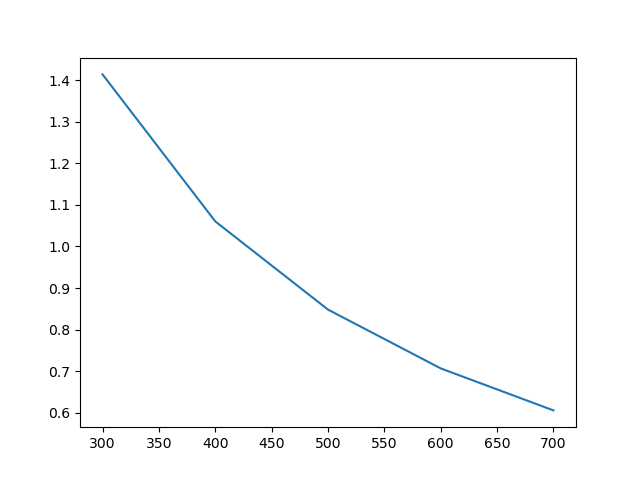

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(kl_arr[:,0],kl_arr[:,1])
plt.show()

In [9]:
print(kl_arr)

[[3.00000000e+02 1.41363695e+00]
 [4.00000000e+02 1.06022771e+00]
 [5.00000000e+02 8.48182168e-01]
 [6.00000000e+02 7.06818473e-01]
 [7.00000000e+02 6.05844406e-01]]


In [10]:
np.savetxt('NbS2Cl2_kl_avg',kl_arr)

In [13]:
####---b----###
Vl=5457.67
Vt=2390.65
Debye Temperature =   292.51 K 
mean velocity  =  2699.32 m/s
Gruneissen parameter =    2.420
thermal conductivity at 300 K is   1.4477

SyntaxError: invalid syntax (1544804563.py, line 4)

In [12]:
#####---C---####
Vl=2819.29     #in m/s
Vt=1184.8096    #in m/s
Debye Temperature =   145.20 K 
mean velocity  =  1339.89 m/s
Gruneissen parameter =    2.542
thermal conductivity at 300 K is   0.1592

SyntaxError: invalid syntax (2255243641.py, line 4)

In [14]:
####----a-----#####
Vl=4651.6828    #in m/s
Vt=2340.3128   #in m/s
Debye Temperature =   284.40 K 
mean velocity  =  2624.43 m/s
Gruneissen parameter =    1.979
thermal conductivity at 300 K is   2.0589

SyntaxError: invalid syntax (135174170.py, line 4)

In [ ]:
#####----avg-----###
Debye Temperature =   234.80 K 

 mean velocity  =  2166.75 m/s

 Gruneissen parameter =    1.775

 thermal conductivity at 300 K is   1.4700